In [48]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
   
###Densidades de energía al día de hoy reportado en la literatura###
Om_0_m=0.0455
Om_0_DM=0.226
Om_0_n=0.000027
Om_0_z=0.00004
Om_0_L=0.728

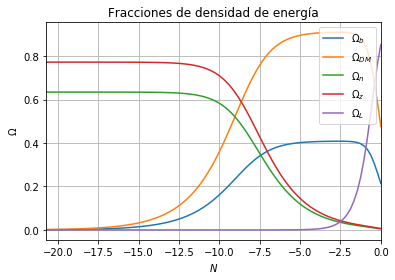

In [54]:
###Fracciones de densidad de energía###


def b(N):
    return ((Om_0_m*np.exp(-3*N))/(Om_0_m*np.exp(-3*N)+Om_0_DM*np.exp(-3*N)+Om_0_n*np.exp(-4*N)+Om_0_z*np.exp(-4*N)+Om_0_L))**0.5

def DM(N):
    return ((Om_0_DM*np.exp(-3*N))/(Om_0_m*np.exp(-3*N)+Om_0_DM*np.exp(-3*N)+Om_0_n*np.exp(-4*N)+Om_0_z*np.exp(-4*N)+Om_0_L))**0.5

def n(N):
    return ((Om_0_n*np.exp(-4*N))/(Om_0_m*np.exp(-3*N)+Om_0_DM*np.exp(-3*N)+Om_0_n*np.exp(-4*N)+Om_0_z*np.exp(-4*N)+Om_0_L))**0.5

def z(N):
    return ((Om_0_z*np.exp(-4*N))/(Om_0_m*np.exp(-3*N)+Om_0_DM*np.exp(-3*N)+Om_0_n*np.exp(-4*N)+Om_0_z*np.exp(-4*N)+Om_0_L))**0.5

def L(N):
    return ((Om_0_L)/(Om_0_m*np.exp(-3*N)+Om_0_DM*np.exp(-3*N)+Om_0_n*np.exp(-4*N)+Om_0_z*np.exp(-4*N)+Om_0_L))**0.5

N = np.linspace(-20.72,0,100)
    
plt.figure()
plt.plot(N , b(N), label= "$\Omega_b$")
plt.plot(N, DM(N), label= "$\Omega_{DM}$")
plt.plot(N, n(N), label= "$\Omega_n$")
plt.plot(N, z(N), label= "$\Omega_z$")
plt.plot(N, L(N), label= "$\Omega_L$")

plt.title("Fracciones de densidad de energía")
plt.xlabel("$N$")
plt.ylabel("$\Omega$")
plt.xlim(-20.72,0)
plt.legend(loc="upper right")
plt.grid()
plt.show()



In [13]:
###EVOLUCIÓN DE DENSIDAD###

#We consider a cosmological model in which:

Omega𝑚_0=0.2999 
OmegaL_0=0.7 
Omega𝑅_0=0.0001 
#Make a plot with the evolution of  𝜌𝑚  with the time for redshift from  𝑧=0  to  𝑧=10000 .
#In order to do it, we propose to follow this path:

#-1- Determine the redshift/scale factor of equivalence  𝑧Λ,𝑚𝑒𝑞/𝑎Λ,𝑚𝑒𝑞  between  ΩΛ  and  Ω𝑚 
#-2- Determine the redshift/scale factor of equivalence  𝑧𝑅,𝑚𝑒𝑞/𝑎𝑅,𝑚𝑒𝑞  between  Ω𝑅  and  Ω𝑚 
#-3- Determine the evolution of  𝑎(𝑡)  for the era of domination of the 3 components

#-4- Determine the evolution of  𝜌𝑚(𝑡)  for the era of domination of the 3 components

#-5- Convert the  𝑎𝑒𝑞  in the corresponding lookback-time

#-6- Plot the evolution of  𝜌𝑚(𝑡)  with the time in log-log scale for the period corresponding to  𝑧=0  up to  𝑧=10000 
#considering the different eras

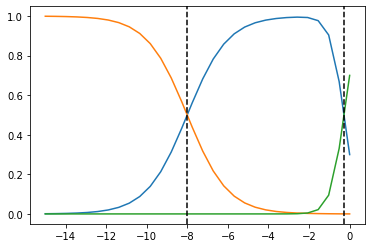

In [14]:
#-1- Determine the redshift/scale factor of equivalence  𝑧Λ,𝑚𝑒𝑞/𝑎Λ,𝑚𝑒𝑞  between  ΩΛ  and  Ω𝑚:

    #La época en la que la densidad de energía de matería es igual a la de radiación tiene un especial significado para 
    #la generación de la estructura de larga escala y para el desarrollo de las anisotropías del CMB, ya que las perturbaciones 
    #crecen a distintas tasas en las dos diferentes eras:
    
    
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def RHS(Omega_i, lna, gamma=0):
    x, y, z = Omega_i
    pi = 3*x + 4*y
    
    return [x*(-3 + pi), y*(-4 + pi), z*pi]

y0 = [0.2999, 0.0001, 0.7] 

lna = np.linspace(0, -15, 30)
result = odeint(RHS, y0, lna)
for i in [0,1,2]:
    plt.plot(lna, result.T[i])
    
#aeq_r=Om_r/(Om_m-Om_r)
#aeq_l=Om_m/(Om_l-Om_m)

aeq_r=y0[1]/(y0[0]-y0[1])
aeq_l=y0[0]/(y0[2]-y0[0])

plt.axvline(x=np.log(aeq_r), c='k',ls='--')
plt.axvline(x=np.log(aeq_l),c='k',ls='--')
    
    
    


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def rk4(d,N,n_0,h):
    
    k1 = np.zeros(d)
    k2 = np.zeros(d)
    k3 = np.zeros(d)
    k4 = np.zeros(d)
    
    Nn_0 = np.zeros(d)
    
    for i in range(d):
        k1[i] = n_0[i](N)
    for i in range(d):
        Nn_0[i] = N[i] + k1[i]*h/2.
    for i in range(d):
        k2[i] = n_0[i](Nn_0)
    for i in range(d):
        Nn_0[i] = N[i] + k2[i]*h/2.
    for i in range(d):
        k3[i] = n_0[i](Nn_0)
    for i in range(d):
        Nn_0[i] = N[i] + k3[i]*h
    for i in range(d):
        k4[i] = n_0[i](Nn_0)
    for i in range(d):
        N[i]=N[i] + (h/6.)*(k1[i] + 2.*k2[i] + 2.*k3[i] + k4[i])
    return N


###Densidades de energía al día de hoy reportado en la literatura###
Om_0_m=0.0455
Om_0_DM=0.226
Om_0_n=0.000027
Om_0_z=0.00004
Om_0_L=0.728
s_0=0.1
w_0=0.1
lam=0
k_0=1
m=0.1

#-------------------------------------------------------------------------------
##def n_01(N):
    #return N[1]

def n_01(N): 
    return ((12/k_0**2)*Om_0_DM*(N[1]/(Om_0_m*np.exp(-3*N[1])+Om_0_DM*np.exp(-3*N[1])+Om_0_n*np.exp(-4*N[1])+Om_0_z*np.exp(4*N[1])+Om_0_L))*np.exp(-3*N[1])
                                  +4*(m**2+lam*n_0[1]**2)(N[1]/(Om_0_m*np.exp(-3*N[1])+Om_0_DM*np.exp(-3*N[1])+Om_0_n*np.exp(-4*N[1])+Om_0_z*np.exp(-4*N[1])+Om_0_L))**2
                                  -4*(s_0/(Om_0_m*np.exp(-3*N[1])+Om_0_DM*np.exp(-3*N[1])+Om_0_n*np.exp(-4*N[1])+Om_0_z*np.exp(-4*N[1])+Om_0_L))**2*np.exp(-4*N[1]))**0.5
    
d=2                          # Number of dimensions taking time into account 
                             # (therefore, at least two dimensions)  

max_N0=1                     # tmax
dN0=0.0005                     # Time step
h=0.001                      # Spatial step size
N=[-20]                     # Initial conditions
n_0=[n_01]                   # Vector whose components are the functions 
                             # (notice that if you're working with more dimensions,
                             #  you have to add more functions as well as initial
                             #  conditions)
                            


In [31]:
cN=[[] for i in range(d)]   # Lists used to graph the results

for i in range(d):
    cN[i].append(N[i])

n=int(max_N0/dN0)
for i in range(n):
    x=rk4(d,N,n_0,h)
    [cN[j].append(N[j]) for j in range(d)]       
  
            
plt.plot(cN[i], cN[j] ,'r')
plt.xlabel(r'$X$ coordinate')
plt.ylabel(r'$Y$ coordinate')
plt.axis('equal')
plt.grid()
plt.show()

IndexError: list index out of range